In [1]:
'''
This Notebook is for testing the Fourier propagation of magnetisation data. 

One can test filters and other modification of the data to ensure that the magenetisation map still makes sense. 

Likewise, the magnetisation data is propagated back into a magnetic field and compared with the original magnetic field. 
The difference in these two images should be relatively small. There will be a small difference that is introduced due 
to the Hanning filter. Unfortantly this is unavoidable if the standoff of the sensor is larger than the pixel size, 
as the propagation to magnetisation will introduce artifacts in the resulting image that the hanning filter removes. 
This comes at the cost of some spatial resolution. 
'''

'\nThis Notebook is for testing the Fourier propagation of magnetisation data. \n\nOne can test filters and other modification of the data to ensure that the magenetisation map still makes sense. \n\nLikewise, the magnetisation data is propagated back into a magnetic field and compared with the original magnetic field. \nThe difference in these two images should be relatively small. There will be a small difference that is introduced due \nto the Hanning filter. Unfortantly this is unavoidable if the standoff of the sensor is larger than the pixel size, \nas the propagation to magnetisation will introduce artifacts in the resulting image that the hanning filter removes. \nThis comes at the cost of some spatial resolution. \n'

In [2]:
cd ..\..

C:\Users\parax\Dropbox\Programming\Python\magnetisation_reconstruction\2D


In [3]:
import numpy as np
import json

from Magnetisation.Propagator import Propagator
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

unit_conversion = 1e-18 / 9.27e-24

In [4]:
# Extract the data
# Load the data
f = open('data/Magnetisation out of plane/CrI3_Exp_B_20180525_001.json')
data = json.load(f)

# Extract the data and 
MagneticField = np.asarray(data['ExperimentMagneticField']['BNV']['Data'])
Magnetization = np.array(data['ExperimentMagneticField']['MagnetisationPropagation']['Magnetisation']['Mag'])
Magnetization2 = Magnetization[:,:256]
Magnetization3 = np.pad(Magnetization2,((11,12),(0,0)))

MagneticField = (((MagneticField - MagneticField.mean())))

# Define the dictionary for the forward propagation
PropagationOptions = dict()
PropagationOptions['PixelSize'] = data['ExperimentMagneticField']['MagnetisationPropagation']['PropStruct']['PixelSizeX']
PropagationOptions['ImageShape'] = 256
PropagationOptions['NV'] = dict()
PropagationOptions['NV']['FindTheta']=False
PropagationOptions['NV']['Theta'] = data['ExperimentMagneticField']['BNV']['Theta']
PropagationOptions['NV']['FindPhi']=False
PropagationOptions['NV']['Phi'] = data['ExperimentMagneticField']['BNV']['Phi']
PropagationOptions['NV']['Height'] = data['ExperimentMagneticField']['BNV']['Height'] 
PropagationOptions['Magnetisation'] = dict()
PropagationOptions['Magnetisation']['FindTheta']=False
PropagationOptions['Magnetisation']['Theta'] = 0
PropagationOptions['Magnetisation']['FindPhi']=False
PropagationOptions['Magnetisation']['Phi'] = 0
PropagationOptions['FFT'] = dict()
PropagationOptions["FFT"]["PaddingFactor"]= 4
PropagationOptions["FFT"]["performPadding"]= False
PropagationOptions["FFT"]["PaddingMode"] = 'constant'
PropagationOptions['FFT']['Extended'] = False
PropagationOptions['FFT']['Extention'] = 100
PropagationOptions['FFT']['Filter'] = dict()
PropagationOptions['FFT']['Filter']['useHanning'] = True 
PropagationOptions['FFT']['Filter']['useHighCutoff'] = False
PropagationOptions['FFT']['Filter']['useLowCutoff'] = False
PropagationOptions['FFT']['Filter']['LambdaHighCutoff'] = 100e-9
PropagationOptions['FFT']['Filter']['LambdaLowCutoff'] = 7e-06

PROP = Propagator(PropagationOptions, MagneticField,PropagationOptions['ImageShape'])


# Get the standard Fourier transformation of the data in magnetisation
PROP2 = Propagator(PropagationOptions, MagneticField,PropagationOptions['ImageShape'])
Magnetisation_F = PROP2.magnetisation(MagneticField)

[[-7.53549450e-06  3.76237144e-06 -1.27441802e-05 ...  1.19513689e-04
   1.17890663e-04  1.19378624e-04]
 [-1.85335388e-07 -1.58980837e-05 -7.83011595e-06 ...  1.36619448e-04
   1.26130110e-04  9.85159989e-05]
 [ 9.13390522e-06  1.12160046e-05 -6.04611319e-06 ...  1.49060235e-04
   1.35009569e-04  1.00844764e-04]
 ...
 [-1.35372647e-05 -9.29539423e-07  9.31861333e-06 ... -2.57342791e-06
  -2.12044531e-06 -2.68553539e-06]
 [ 5.83121325e-06  3.14234773e-06 -1.69652030e-05 ... -6.65638212e-06
   6.40486378e-06 -1.80236478e-05]
 [ 1.07535632e-05 -1.01499826e-06  1.60494578e-05 ...  7.44787189e-06
  -1.25885096e-05 -3.15629203e-06]]
[[-7.53549450e-06  3.76237144e-06 -1.27441802e-05 ...  1.19513689e-04
   1.17890663e-04  1.19378624e-04]
 [-1.85335388e-07 -1.58980837e-05 -7.83011595e-06 ...  1.36619448e-04
   1.26130110e-04  9.85159989e-05]
 [ 9.13390522e-06  1.12160046e-05 -6.04611319e-06 ...  1.49060235e-04
   1.35009569e-04  1.00844764e-04]
 ...
 [-1.35372647e-05 -9.29539423e-07  9.3186133

C:\Users\parax\Dropbox\Programming\Python\magnetisation_reconstruction\2D\Magnetisation\Propagator.py:356: RuntimeWarning: invalid value encountered in true_divide
  [-(kx ** 2) / k, -(kx * ky) / k, -1j * kx],
C:\Users\parax\Dropbox\Programming\Python\magnetisation_reconstruction\2D\Magnetisation\Propagator.py:357: RuntimeWarning: invalid value encountered in true_divide
  [-kx * ky / k, -(ky ** 2 / k), -1j * ky],
C:\Users\parax\Dropbox\Programming\Python\magnetisation_reconstruction\2D\Magnetisation\Propagator.py:597: RuntimeWarning: divide by zero encountered in true_divide
  mz_to_b = 1 / (
C:\Users\parax\Dropbox\Programming\Python\magnetisation_reconstruction\2D\Magnetisation\Propagator.py:597: RuntimeWarning: invalid value encountered in true_divide
  mz_to_b = 1 / (


In [5]:

# Get the magnetisation with an extention of the data to simulate the magnetic tails
PropagationOptions['FFT']['Extended'] = True
PropagationOptions['FFT']['Extention'] = 100
PROP2 = Propagator(PropagationOptions, MagneticField,PropagationOptions['ImageShape'])
Magnetisation_F_Extended = PROP2.magnetisation(MagneticField)


# Get the magnetisation with padding
PropagationOptions['FFT']['Extended'] = True
PropagationOptions["FFT"]["performPadding"]= True
PropagationOptions["FFT"]["PaddingMode"] = 'constant'
PROP2 = Propagator(PropagationOptions, MagneticField,PropagationOptions['ImageShape'])
Magnetisation_F_Padding = PROP2.magnetisation(MagneticField)


[[-7.53549450e-06  3.76237144e-06 -1.27441802e-05 ...  1.19513689e-04
   1.17890663e-04  1.19378624e-04]
 [-1.85335388e-07 -1.58980837e-05 -7.83011595e-06 ...  1.36619448e-04
   1.26130110e-04  9.85159989e-05]
 [ 9.13390522e-06  1.12160046e-05 -6.04611319e-06 ...  1.49060235e-04
   1.35009569e-04  1.00844764e-04]
 ...
 [-1.35372647e-05 -9.29539423e-07  9.31861333e-06 ... -2.57342791e-06
  -2.12044531e-06 -2.68553539e-06]
 [ 5.83121325e-06  3.14234773e-06 -1.69652030e-05 ... -6.65638212e-06
   6.40486378e-06 -1.80236478e-05]
 [ 1.07535632e-05 -1.01499826e-06  1.60494578e-05 ...  7.44787189e-06
  -1.25885096e-05 -3.15629203e-06]]
[[-7.53549450e-06  3.76237144e-06 -1.27441802e-05 ...  1.19513689e-04
   1.17890663e-04  1.19378624e-04]
 [-1.85335388e-07 -1.58980837e-05 -7.83011595e-06 ...  1.36619448e-04
   1.26130110e-04  9.85159989e-05]
 [ 9.13390522e-06  1.12160046e-05 -6.04611319e-06 ...  1.49060235e-04
   1.35009569e-04  1.00844764e-04]
 ...
 [-1.35372647e-05 -9.29539423e-07  9.3186133

array([11.3])

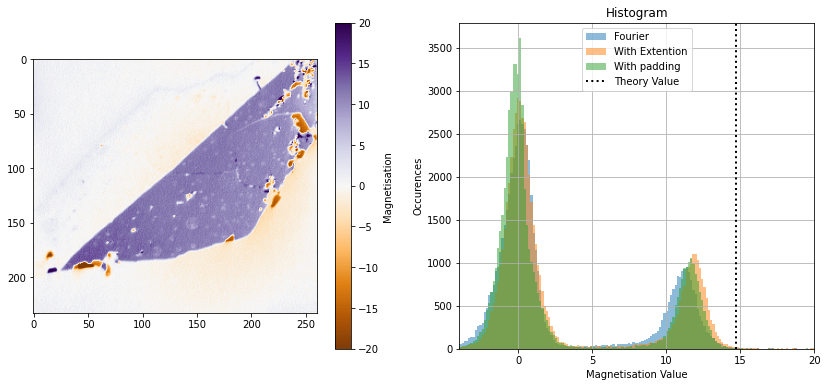

In [6]:
HistValues = np.histogram(Magnetisation_F.flatten(), bins=200, range=(-10,20))
offset = HistValues[1][np.argmax(HistValues[0])]
Plotting_M = Magnetisation_F - offset

HistValues = np.histogram(Magnetisation_F_Extended.flatten(), bins=200, range=(-10,20))
offset = HistValues[1][np.argmax(HistValues[0])]
Plotting_M_Extended = Magnetisation_F_Extended - offset


HistValues = np.histogram(Magnetisation_F_Padding.flatten(), bins=200, range=(-10,20))
offset = HistValues[1][np.argmax(HistValues[0])]
Plotting_M_Padding = Magnetisation_F_Padding - offset



# Plot the data
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(14)


plt.subplot(1,2,1)
plt.imshow(Plotting_M, cmap="PuOr")
plt.colorbar(label="Magnetisation")
plt.clim([-20, 20])

plt.subplot(1,2,2)
MagFValues1 = plt.hist(Plotting_M.flatten(), bins=200, range = (-10,20), alpha = 0.5, label='Fourier')
MagFValues2 = plt.hist(Plotting_M_Extended.flatten(), bins=200, range=(-10,20), alpha = 0.5, label='With Extention')
MagFValues3 = plt.hist(Plotting_M_Padding.flatten(), bins=200, range=(-10,20), alpha = 0.5, label='With padding')

plt.axvline(x=14.7, color='black', linestyle='dotted', linewidth=2,label='Theory Value')
plt.title('Histogram')
plt.xlim([-4,20])
plt.ylabel('Occurences')
plt.xlabel('Magnetisation Value')
plt.grid()
plt.legend()

MaximumValue = np.max(MagFValues1[0][100::]);
binValue = np.where(MagFValues1[0] == MaximumValue)

display(MagFValues1[1][binValue])


Text(0.5, 1.0, 'orig - FFT')

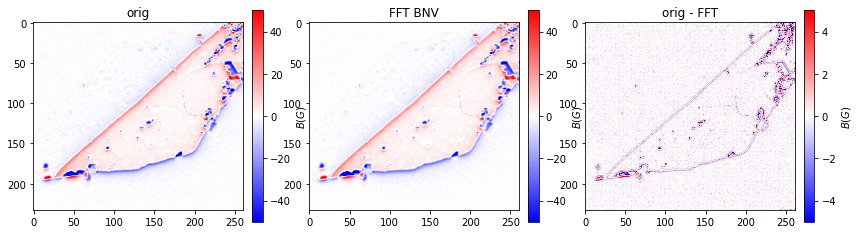

In [7]:
# Reverse the propagation to get the magnetic field from the magnetisation. 
PROP3 = Propagator(PropagationOptions, Magnetisation=Magnetisation_F)
FFT_BNV_temp = (PROP3.bxyz_from_mag(Magnetisation_F))

FFT_BNV = FFT_BNV_temp[0]

fig = plt.figure()
# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(6)

# set width of each subplot as 8
fig.set_figwidth(14)

plt.subplot(1,3,1)
plt.imshow(MagneticField*unit_conversion ,cmap='bwr')
plt.clim([-50,50])
plt.colorbar(fraction=0.046, pad=0.04,label="$B (G)$")
plt.title('orig')

plt.subplot(1,3,2)
plt.imshow(FFT_BNV ,cmap='bwr')
plt.clim([-50,50])
plt.colorbar(fraction=0.046, pad=0.04,label="$B (G)$")
plt.title('FFT BNV')

plt.subplot(1,3,3)
plt.imshow(MagneticField*unit_conversion - FFT_BNV ,cmap='bwr')
plt.colorbar(fraction=0.046, pad=0.04,label="$B (G)$")
plt.clim([-5,5])
plt.title('orig - FFT')